# 3. DATA PRE-PROCESSING

## Import libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import shutil
import stat
import re
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
input_folder = '../data/raw_photos'
output_folder = '../data/processed_photos'
os.makedirs(output_folder, exist_ok=True)

## Merge the folders divided among members into a unified folder

### Handle folder `data/raw_photos`

In [3]:
def remove_readonly(func, path, exc_info):
    os.chmod(path, stat.S_IWRITE)
    func(path)

# Move images from subfolders of data\raw_photos to data\raw_photos and remove those subfolders
for subfolder in tqdm(os.listdir(input_folder)):
    subfolder_path = os.path.join(input_folder, subfolder)

    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            shutil.move(file_path, input_folder)
        shutil.rmtree(subfolder_path, onerror=remove_readonly)

print("✅ Moved images from subfolders to data/raw_photos")

100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

✅ Moved images from subfolders to data/raw_photos


In [4]:
n_images = len([name for name in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, name))])
print(f"Number of images in the input folder: {n_images}")

Number of images in the input folder: 1077


### Handle folder `data/annotations`

In [5]:
annotations_folder = '../data/annotations'

pattern = re.compile(r'captions_.*_cleaned\.txt')

for file in os.listdir(annotations_folder):
    if pattern.match(file):
        file_path = os.path.join(annotations_folder, file)
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"✅ Removed {file_path}")
        else:
            print(f"❌ {file_path} does not exist")

✅ Removed ../data/annotations\captions_L_cleaned.txt
✅ Removed ../data/annotations\captions_Q_cleaned.txt
✅ Removed ../data/annotations\captions_T_cleaned.txt
✅ Removed ../data/annotations\captions_V_cleaned.txt


## Pre-processing

In [6]:
TARGET_SIZE = (224, 224) # (width, height) with 224 is the default size for many models

1. Remove corrupted, blurry, or irrelevant images **manually**

2. Convert to the same format (jpg), same size

In [7]:
def preprocess_images(input_folder, output_folder):
    for filename in tqdm(os.listdir(input_folder)):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".jpg")

        try:
            # Load image
            img = Image.open(input_path).convert('RGB')
            img = img.resize(TARGET_SIZE, Image.LANCZOS)

            # Save image as JPG
            img.save(output_path, "JPEG")

        except Exception as e:
            print(f"❌ Error processing {input_path}: {e}")

In [8]:
preprocess_images(input_folder, output_folder)
print(f"✅ Processed {len(os.listdir(output_folder))} images")

 19%|█▉        | 202/1077 [00:12<00:42, 20.67it/s]

❌ Error processing ../data/raw_photos\captions.txt: cannot identify image file '../data/raw_photos\\captions.txt'


100%|██████████| 1077/1077 [01:01<00:00, 17.59it/s]

✅ Processed 1076 images


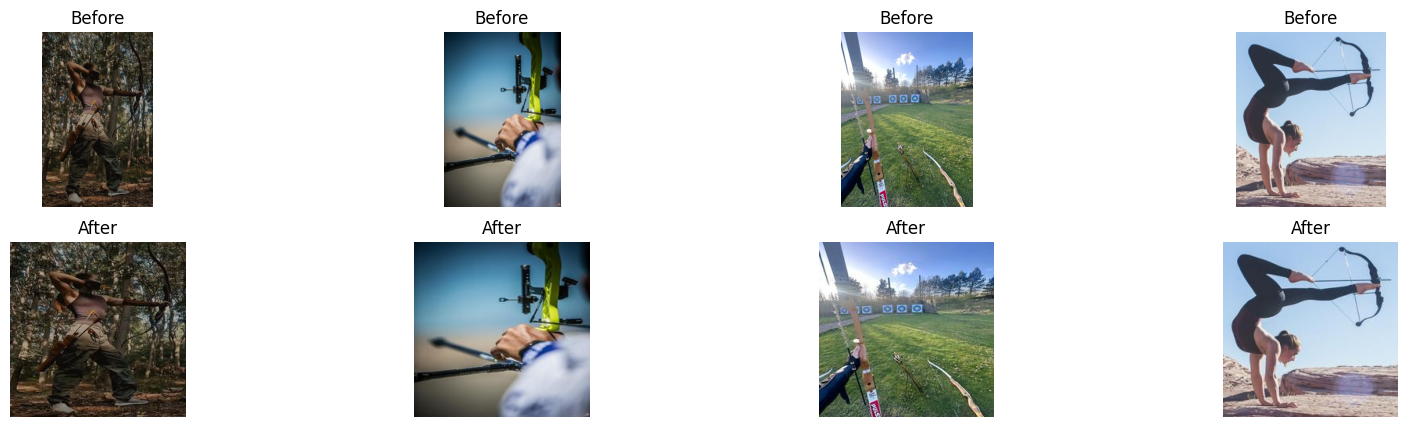

In [9]:
# Show some images before and after preprocessing
n_images_to_show = 4
fig, axes = plt.subplots(2, n_images_to_show, figsize=(20, 5))

for i, filename in enumerate(os.listdir(input_folder)[:n_images_to_show]):
    img = Image.open(os.path.join(input_folder, filename))
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title("Before")

for i, filename in enumerate(os.listdir(output_folder)[:n_images_to_show]):
    img = Image.open(os.path.join(output_folder, filename))
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("After")

plt.show()